## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [205]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

### Exercise 1.

In [218]:
import pandas as pd
import numpy as np
df=pd.read_csv('data_000637.txt',nrows=50000)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
49995,1,1,2,3869200664,1103,4
49996,1,1,4,3869200664,1105,14
49997,1,0,59,3869200664,1191,17
49998,1,0,32,3869200664,1191,1


### Exercise 2.

In [208]:

df2=pd.read_csv('data_000637.txt',nrows=50000)
Unique_keys=np.unique(df2['ORBIT_CNT'])
bx_max=[df2['BX_COUNTER'][df2['ORBIT_CNT']==key].max() for key in Unique_keys] 
bx_orbit=np.array([Unique_keys,bx_max])
print(bx_orbit)

[[3869200167 3869200168 3869200169 3869200170 3869200171 3869200172
  3869200173 3869200174 3869200175 3869200176 3869200177 3869200178
  3869200179 3869200180 3869200181 3869200182 3869200183 3869200184
  3869200185 3869200186 3869200187 3869200188 3869200189 3869200190
  3869200191 3869200192 3869200193 3869200194 3869200195 3869200196
  3869200197 3869200198 3869200199 3869200200 3869200201 3869200202
  3869200203 3869200204 3869200205 3869200206 3869200207 3869200208
  3869200209 3869200210 3869200211 3869200212 3869200213 3869200214
  3869200215 3869200216 3869200217 3869200218 3869200219 3869200220
  3869200221 3869200222 3869200223 3869200224 3869200225 3869200226
  3869200227 3869200228 3869200229 3869200230 3869200231 3869200232
  3869200233 3869200234 3869200235 3869200236 3869200237 3869200238
  3869200239 3869200240 3869200241 3869200242 3869200243 3869200244
  3869200245 3869200246 3869200247 3869200248 3869200249 3869200250
  3869200251 3869200252 3869200253 3869200254 38

### Exercise 3

In [209]:
df3=pd.read_csv('data_000637.txt',index_col=3,nrows=50000)
Unique_keys=np.unique(df3['BX_COUNTER'].keys())
bx=0
n=1310720
#df3['BX_COUNTER'][key]
for key in Unique_keys:
    lista=np.array(df3['BX_COUNTER'][key])
    bx+=max(lista)*25*10**(-9)+np.array(df3['TDC_MEAS'][key])[np.argmax(lista)]*5/6*10**(-9)


In [210]:
print('The data acquisition took',n*bx/50000,'s')


The data acquisition took 1.0579647747413325 s


### Exercise 4

In [211]:
df3=pd.read_csv('data_000637.txt',index_col=3,nrows=50000)

Time_abs=np.zeros(50000)
i_tot=0
prev_time=0
for key in Unique_keys:
    bx=np.array(df3['BX_COUNTER'][key])*25
    tdc=np.array(df3['TDC_MEAS'][key])*(5/6)
    for i in range(len(df3['BX_COUNTER'][key])):
        i_now=i_tot+i
        Time_abs[i_now]=bx[i]+tdc[i]+prev_time
    prev_time=max(Time_abs[i_tot:])
    i_tot+=i+1
Time_abs*=10**(-9)
df3['TIME_ABS']=Time_abs
df3

,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS,TIME_ABS
ORBIT_CNT,,,,,,
3869200167,1,0,123,2374,26,0.000059
3869200167,1,0,124,2374,27,0.000059
3869200167,1,0,63,2553,28,0.000064
3869200167,1,0,64,2558,19,0.000064
3869200167,1,0,64,2760,25,0.000069
...,...,...,...,...,...,...
3869200664,1,1,2,1103,4,0.040356
3869200664,1,1,4,1105,14,0.040356
3869200664,1,0,59,1191,17,0.040359


### Exercise 5

In [212]:
df3['HEAD']=np.random.randint(0,2,50000)
df3

,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS,TIME_ABS
ORBIT_CNT,,,,,,
3869200167,1,0,123,2374,26,0.000059
3869200167,1,0,124,2374,27,0.000059
3869200167,0,0,63,2553,28,0.000064
3869200167,1,0,64,2558,19,0.000064
3869200167,0,0,64,2760,25,0.000069
...,...,...,...,...,...,...
3869200664,0,1,2,1103,4,0.040356
3869200664,1,1,4,1105,14,0.040356
3869200664,1,0,59,1191,17,0.040359


### Exercise 6

In [213]:
df4=df3[df3['HEAD']==1]

In [214]:
df4

,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS,TIME_ABS
ORBIT_CNT,,,,,,
3869200167,1,0,123,2374,26,0.000059
3869200167,1,0,124,2374,27,0.000059
3869200167,1,0,64,2558,19,0.000064
3869200167,1,0,61,2772,14,0.000069
3869200167,1,0,139,2776,0,0.000069
...,...,...,...,...,...,...
3869200664,1,0,50,1029,4,0.040355
3869200664,1,0,49,1036,8,0.040355
3869200664,1,0,47,1040,5,0.040355


### Exercise 7

139


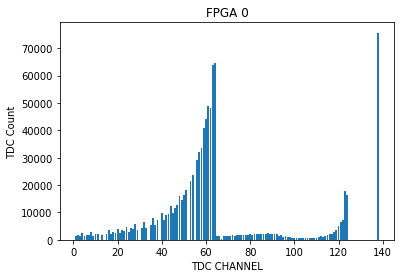

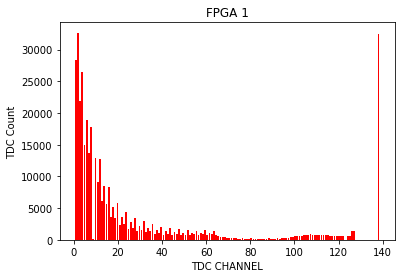

In [215]:
import matplotlib.pyplot as plt
df3=pd.read_csv('data_000637.txt',index_col=3)
tdc0=df3['TDC_CHANNEL'][df3['FPGA']==0]
print(max(tdc0))
tdc1=df3['TDC_CHANNEL'][df3['FPGA']==1]
hist0,edge0=np.histogram(tdc0,bins=(max(tdc0)-1))
hist1,edge1=np.histogram(tdc1,bins=max(tdc1))


plt.bar(edge0[:-1],hist0)
plt.xlabel('TDC CHANNEL')
plt.ylabel('TDC Count')
plt.title('FPGA 0')
plt.show()
plt.bar(edge1[:-1],hist1,color='r')
plt.xlabel('TDC CHANNEL')
plt.ylabel('TDC Count')
plt.title('FPGA 1')
plt.show()

### Exercise 8

In [216]:

df30=df3[df3['FPGA']==0]
tdc0=df30.groupby('TDC_CHANNEL').sum()
df31=df3[df3['FPGA']==1]
tdc1=df31.groupby('TDC_CHANNEL').sum()

In [217]:
sorted0=tdc0.sort_values('HEAD')[::-1]
print('The noisiest channels on FPGA0 are \n \n',sorted0[:3],'\n \n \n')
sorted1=tdc1.sort_values('HEAD')[::-1]
print('The noisiest channels on FPGA1 are \n \n',sorted1[:3],'\n \n \n')

The noisiest channels on FPGA0 are 
 
               HEAD  FPGA  BX_COUNTER  TDC_MEAS
TDC_CHANNEL                                   
139          75617     0   134482540         0
64           64581     0   115180305    941085
63           63724     0   113828187    924689 
 
 

The noisiest channels on FPGA1 are 
 
               HEAD   FPGA  BX_COUNTER  TDC_MEAS
TDC_CHANNEL                                    
2            32669  32669    58194220    475221
139          32442  32442    57995164         0
1            28438  28438    50854862    413328 
 
 



### Exercise 9 

In [167]:
print('There are',len(np.unique(df3['BX_COUNTER'].keys())), 'Unique orbits')

There are 11001 Unique orbits


In [183]:
df6=df3[df3['TDC_CHANNEL']==139]
print('There are',len(np.unique(df6['BX_COUNTER'].keys())), 'Unique orbits with at least one measurement from TDC Channel 139')

There are 10976 Unique orbits with at least one measurement from TDC Channel 139
